# Car Class Predictor
The project is to build the best model that predicts the class of a vehicle based on the different feautures present in 'cars_class.csv' dataset. This is a multi-class classification data set. The target variable is the class of the car which may be one of: 0 –bus, 1 – Opel Manta, 2 – Saab, 3 – Van. 

In [984]:
#Importing data from csv file
import pandas as pd
df = pd.read_csv('cars_class.csv')

In [985]:
df.shape

(719, 20)

# Understanding  the Dataset

In [986]:
df.info() #No Missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [987]:
df['Class'].value_counts()

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

In [988]:
df.drop('ID', axis=1, inplace=True) #As ID of the vehicle doesn't co relate to the classifier, this feature is dropped.

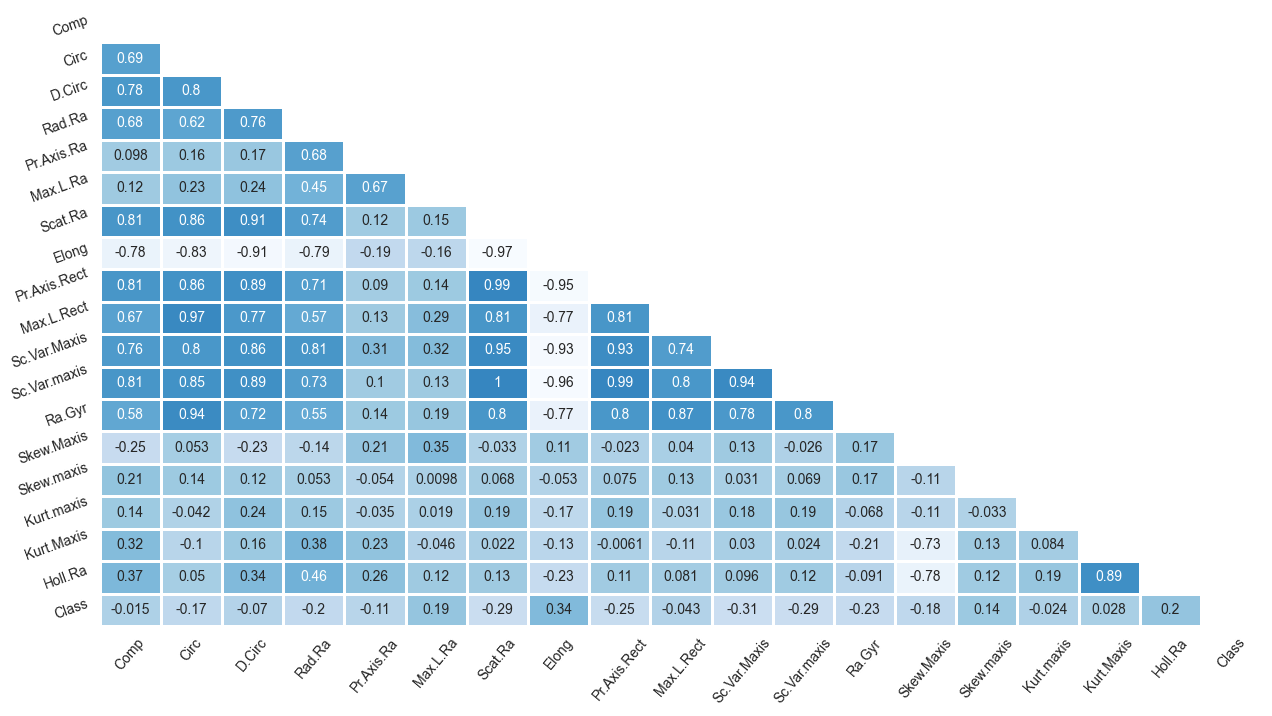

In [989]:
#Understanding the dataset and co-relation of features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Heatmap
#Correlation Matrix
corr = df.corr() # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  

plt.figure(figsize = (15,8))  
sns.set_style(style = 'white')  
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)   
plt.show()

In [990]:
#Dropping highly co-related features
df.drop(['Scat.Ra', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis'], axis=1, inplace=True)

<AxesSubplot:>

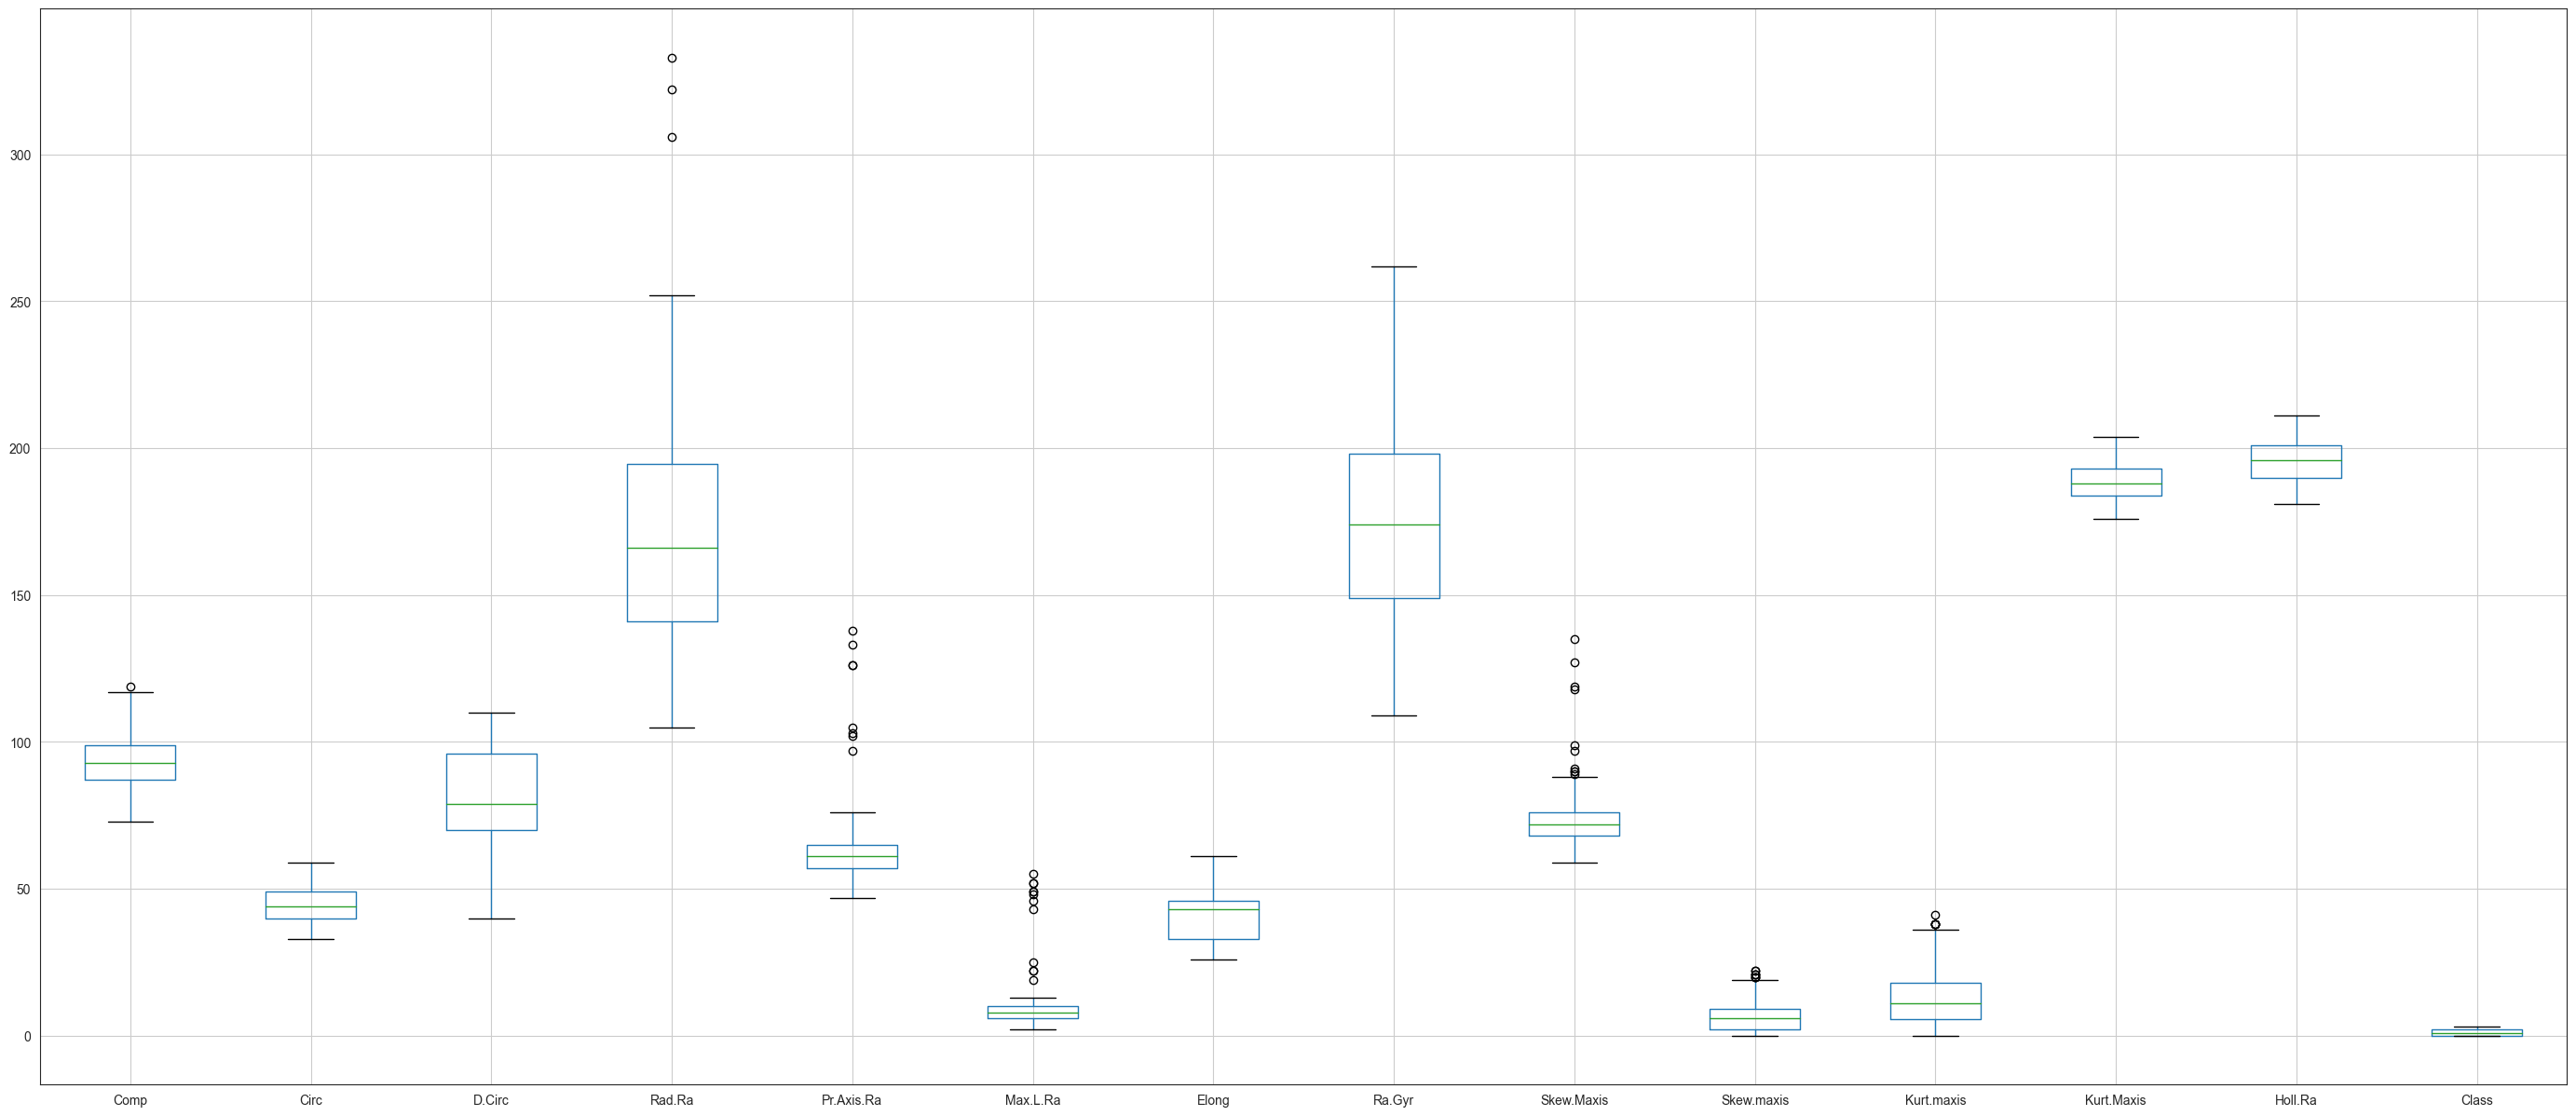

In [991]:
df.boxplot(figsize=(35,15))

# Handling Outliers

In [992]:
def handleOutlier(aSeries):
    
    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)
    q2 = aSeries.quantile(0.5)
   
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < fence_low)]
    outliers_high= aSeries[(aSeries > fence_high)]
    
    print ("25th Quantile value: ", q1)
    print('Outlier low Count =', outliers_low.count())
    print('List of Low outliers: \n')
    print(outliers_low)
    
    print ("75th Quantile value: ", q3)
    print('Outlier High Count = ', outliers_high.count())
    print('List of High outliers: \n')
    print(outliers_high)

In [993]:
handleOutlier(df['Rad.Ra'])

25th Quantile value:  141.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Rad.Ra, dtype: int64)
75th Quantile value:  194.5
Outlier High Count =  3
List of High outliers: 

69     306
271    322
655    333
Name: Rad.Ra, dtype: int64


In [994]:
df.loc[[69, 271, 655]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
69,90,48,86,306,126,49,44,200,118,0,15,185,194,3
271,89,47,83,322,133,48,43,176,97,0,14,184,194,3
655,94,47,85,333,138,49,43,187,135,12,9,188,196,3


In [995]:
df[df['Class']==3]['Rad.Ra'].sort_values( ascending=False).head(8)

655    333
271    322
69     306
505    250
647    246
119    231
247    178
378    176
Name: Rad.Ra, dtype: int64

In [996]:
df.loc[[69, 271, 655],'Rad.Ra'] = 250

In [997]:
handleOutlier(df['Pr.Axis.Ra'])

25th Quantile value:  57.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Pr.Axis.Ra, dtype: int64)
75th Quantile value:  65.0
Outlier High Count =  8
List of High outliers: 

69     126
119     97
271    133
355    126
404    103
505    105
647    102
655    138
Name: Pr.Axis.Ra, dtype: int64


In [998]:
df.loc[[69, 355, 404, 271, 647, 119, 655, 505]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
69,90,48,86,250,126,49,44,200,118,0,15,185,194,3
355,82,45,66,252,126,52,45,185,119,1,1,181,185,0
404,85,44,70,205,103,52,45,188,127,9,11,180,183,0
271,89,47,83,250,133,48,43,176,97,0,14,184,194,3
647,89,45,81,246,102,43,44,177,90,9,17,183,192,3
119,90,43,81,231,97,46,45,164,91,5,9,186,196,3
655,94,47,85,250,138,49,43,187,135,12,9,188,196,3
505,82,43,70,250,105,55,48,172,99,4,9,190,199,3


In [999]:
df[df['Class']==0]['Pr.Axis.Ra'].sort_values( ascending=False).head(8)

355    126
404    103
638     76
560     75
580     75
455     75
42      75
489     75
Name: Pr.Axis.Ra, dtype: int64

In [1000]:
df.loc[[355, 404],'Pr.Axis.Ra'] = 76

In [1001]:
df[df['Class']==3]['Pr.Axis.Ra'].sort_values( ascending=False).head(10)

655    138
271    133
69     126
505    105
647    102
119     97
247     72
244     70
549     69
38      68
Name: Pr.Axis.Ra, dtype: int64

In [1002]:
df.loc[[655, 271, 69, 505, 647, 119],'Pr.Axis.Ra'] = 72

In [1003]:
handleOutlier(df['Max.L.Ra'])

25th Quantile value:  6.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Max.L.Ra, dtype: int64)
75th Quantile value:  10.0
Outlier High Count =  12
List of High outliers: 

69     49
97     22
119    46
271    48
355    52
376    25
404    52
505    55
647    43
655    49
673    19
682    22
Name: Max.L.Ra, dtype: int64


In [1004]:
df.loc[[69, 97, 119,  271, 355, 376, 404, 505, 647, 655, 673, 682]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
69,90,48,86,250,72,49,44,200,118,0,15,185,194,3
97,85,41,66,155,65,22,45,155,75,6,16,184,191,0
119,90,43,81,231,72,46,45,164,91,5,9,186,196,3
271,89,47,83,250,72,48,43,176,97,0,14,184,194,3
355,82,45,66,252,76,52,45,185,119,1,1,181,185,0
376,91,38,70,160,66,25,47,130,67,4,11,192,202,3
404,85,44,70,205,76,52,45,188,127,9,11,180,183,0
505,82,43,70,250,72,55,48,172,99,4,9,190,199,3
647,89,45,81,246,72,43,44,177,90,9,17,183,192,3
655,94,47,85,250,72,49,43,187,135,12,9,188,196,3


In [1005]:
df[df['Class']==0]['Max.L.Ra'].sort_values( ascending=False).head(8)

404    52
355    52
682    22
97     22
673    19
343     8
377     8
532     8
Name: Max.L.Ra, dtype: int64

In [1006]:
df.loc[[404, 355, 682, 97, 673], 'Max.L.Ra'] = 8

In [1007]:
df[df['Class']==3]['Max.L.Ra'].sort_values( ascending=False).head(15)

505    55
69     49
655    49
271    48
119    46
647    43
376    25
244    12
120    12
482    12
653    11
141    11
242    11
405    11
383    11
Name: Max.L.Ra, dtype: int64

In [1008]:
df.loc[[505, 69, 655, 671, 271, 119, 647, 376], 'Max.L.Ra'] = 12

In [1009]:
handleOutlier(df['Skew.Maxis'])

25th Quantile value:  68.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Skew.Maxis, dtype: int64)
75th Quantile value:  76.0
Outlier High Count =  10
List of High outliers: 

69     118
75      89
119     91
195     90
271     97
355    119
404    127
505     99
647     90
655    135
Name: Skew.Maxis, dtype: int64


In [1010]:
df.loc[[69, 75, 119, 195, 271, 355, 404, 505, 647, 655]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
69,90,48,86,250,72,12,44,200,118,0,15,185,194,3
75,85,35,47,110,55,3,57,139,89,5,9,180,184,3
119,90,43,81,231,72,12,45,164,91,5,9,186,196,3
195,86,35,44,110,54,2,57,137,90,6,1,180,183,3
271,89,47,83,250,72,12,43,176,97,0,14,184,194,3
355,82,45,66,252,76,8,45,185,119,1,1,181,185,0
404,85,44,70,205,76,8,45,188,127,9,11,180,183,0
505,82,43,70,250,72,12,48,172,99,4,9,190,199,3
647,89,45,81,246,72,12,44,177,90,9,17,183,192,3
655,94,47,85,250,72,12,43,187,135,12,9,188,196,3


In [1011]:
df.loc[[69, 75, 119, 195, 271, 355, 404, 505, 647, 655], 'Skew.Maxis'] = 88

In [1012]:
handleOutlier(df['Skew.maxis'])

25th Quantile value:  2.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Skew.maxis, dtype: int64)
75th Quantile value:  9.0
Outlier High Count =  8
List of High outliers: 

74     21
220    20
358    20
362    21
490    20
510    22
598    22
681    21
Name: Skew.maxis, dtype: int64


In [1013]:
df.loc[[74,220,358,362,490,510,598,681]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
74,117,52,110,228,65,12,31,220,66,21,25,194,205,2
220,97,48,94,198,63,9,36,189,64,20,11,199,203,1
358,85,38,63,130,55,7,55,144,64,20,8,195,201,1
362,107,53,108,213,64,12,32,202,65,21,22,194,205,2
490,119,54,106,220,65,12,31,232,66,20,1,192,202,2
510,106,52,108,207,64,12,31,200,73,22,38,190,205,2
598,90,36,57,130,57,6,56,132,68,22,23,190,195,2
681,111,53,108,211,61,11,32,216,64,21,2,196,205,2


In [1014]:
df[df['Class']==2]['Skew.maxis'].sort_values( ascending=False).head(10)

510    22
598    22
362    21
681    21
74     21
490    20
113    19
379    18
278    18
612    17
Name: Skew.maxis, dtype: int64

In [1015]:
df.loc[[362, 510, 681, 490, 74, 598], 'Skew.maxis'] = 19

In [1016]:
handleOutlier(df['Comp'])

25th Quantile value:  87.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Comp, dtype: int64)
75th Quantile value:  99.0
Outlier High Count =  1
List of High outliers: 

490    119
Name: Comp, dtype: int64


In [1017]:
df.loc[[490]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
490,119,54,106,220,65,12,31,232,66,19,1,192,202,2


In [1018]:
df[df['Class']==2]['Comp'].sort_values( ascending=False).head()

490    119
74     117
391    115
612    113
594    113
Name: Comp, dtype: int64

In [1019]:
df.loc[490, 'Comp'] = 117

In [1020]:
handleOutlier(df['Kurt.maxis'])

25th Quantile value:  5.5
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Kurt.maxis, dtype: int64)
75th Quantile value:  18.0
Outlier High Count =  6
List of High outliers: 

89     38
226    41
470    38
488    38
510    38
600    38
Name: Kurt.maxis, dtype: int64


In [1021]:
df.loc[[89, 226, 470, 488, 510, 600]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
89,101,46,105,195,61,10,34,195,66,7,38,192,205,2
226,97,42,101,186,59,9,36,168,67,7,41,194,206,2
470,84,39,90,180,60,7,37,145,71,4,38,190,198,1
488,101,48,107,222,68,10,32,204,70,5,38,190,202,1
510,106,52,108,207,64,12,31,200,73,19,38,190,205,2
600,95,46,105,219,68,9,33,201,69,5,38,191,202,1


In [1022]:
df[df['Class']==2]['Kurt.maxis'].sort_values( ascending=False).head(10)

226    41
510    38
89     38
187    36
323    35
183    35
4      33
181    32
633    32
265    31
Name: Kurt.maxis, dtype: int64

In [1023]:
df.loc[[226,510,89], 'Kurt.maxis'] = 36

In [1024]:
df[df['Class']==1]['Kurt.maxis'].sort_values( ascending=False).head(10)

470    38
488    38
600    38
91     36
199    35
9      33
434    33
541    33
340    32
49     32
Name: Kurt.maxis, dtype: int64

In [1025]:
df.loc[[600,470,488], 'Kurt.maxis'] = 36

<AxesSubplot:>

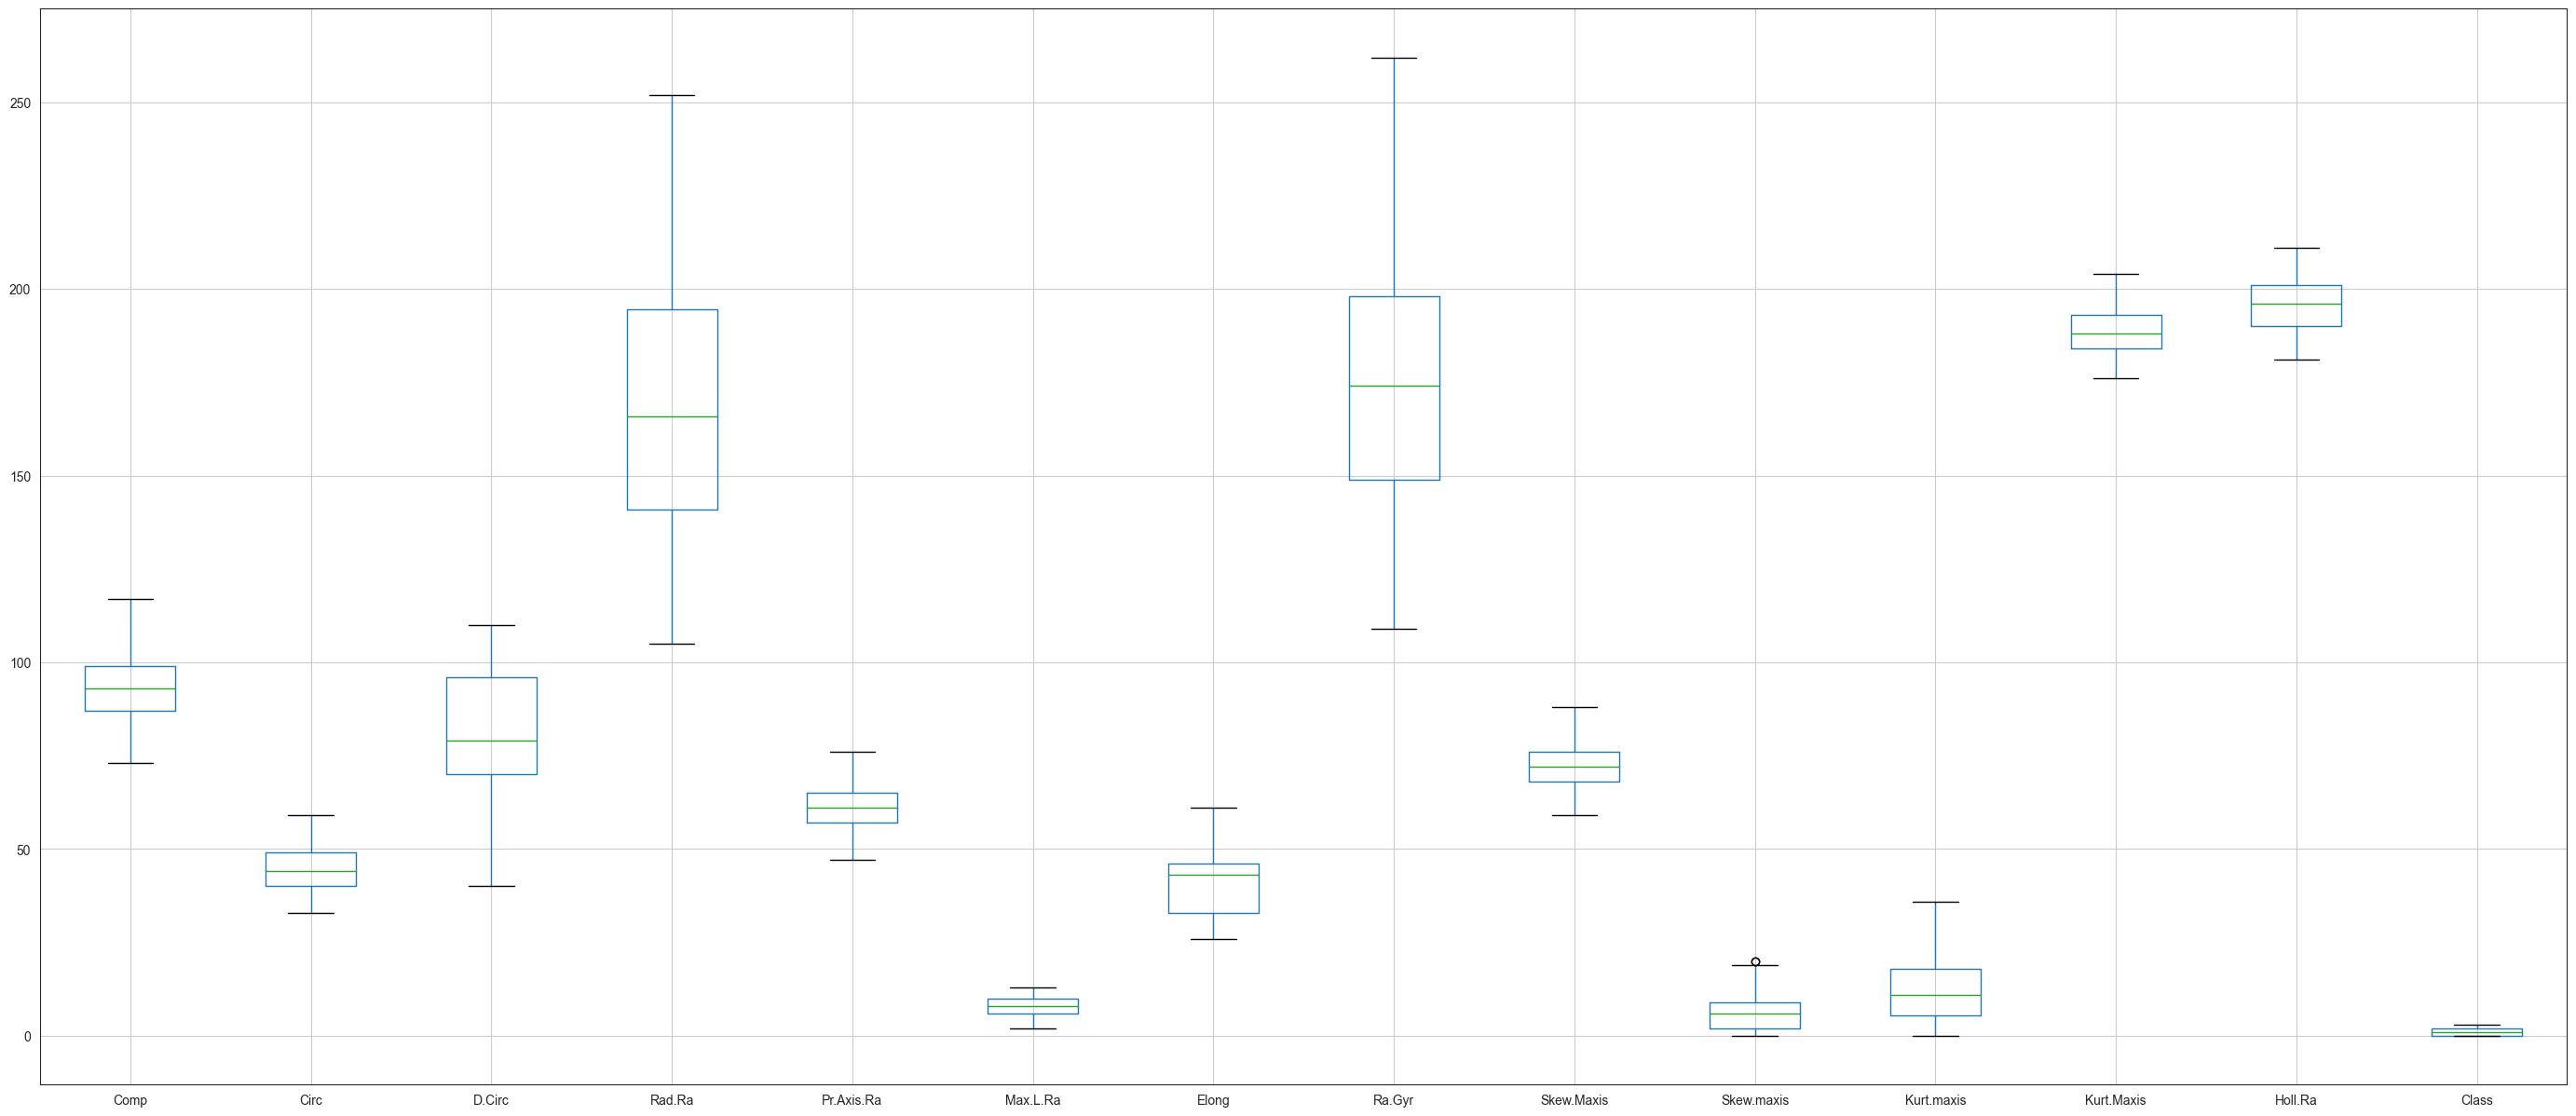

In [1026]:
df.boxplot(figsize=(35,15))

In [1027]:
handleOutlier(df['Skew.maxis'])

25th Quantile value:  2.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: Skew.maxis, dtype: int64)
75th Quantile value:  9.0
Outlier High Count =  2
List of High outliers: 

220    20
358    20
Name: Skew.maxis, dtype: int64


In [1028]:
df.loc[[220,358]]

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
220,97,48,94,198,63,9,36,189,64,20,11,199,203,1
358,85,38,63,130,55,7,55,144,64,20,8,195,201,1


In [1029]:
df[df['Class']==1]['Skew.maxis'].sort_values( ascending=False).head(10)

220    20
358    20
539    19
322    18
180    17
150    16
526    16
318    16
29     16
237    15
Name: Skew.maxis, dtype: int64

In [1030]:
df.loc[[220,358], 'Skew.maxis'] = 19

<AxesSubplot:>

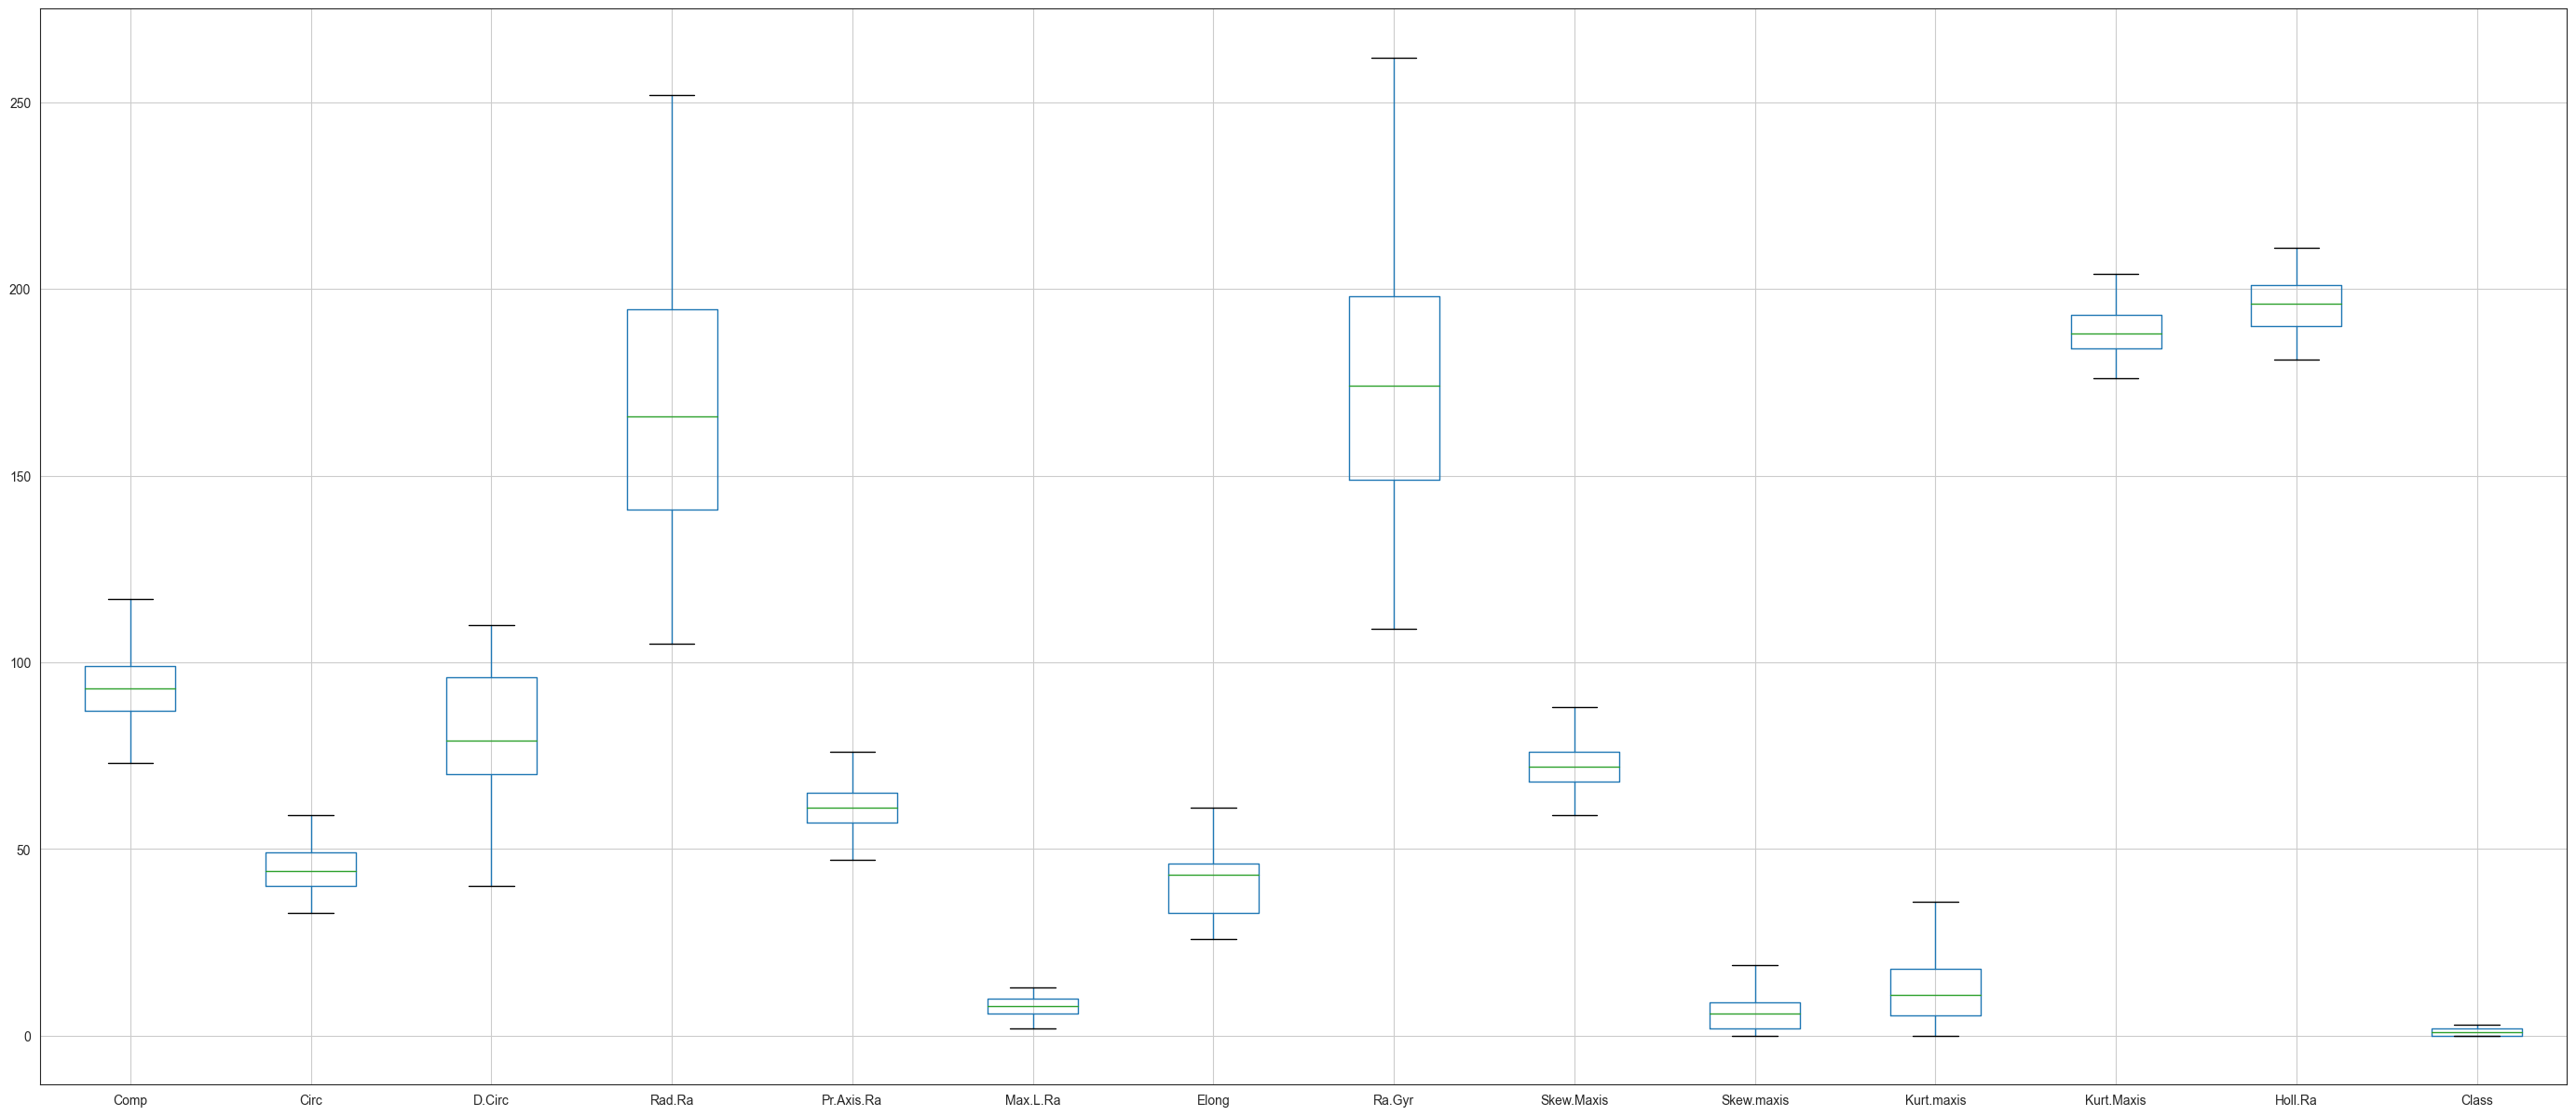

In [1031]:
df.boxplot(figsize=(35,15))

# Preprocessing

In [1032]:
df.shape

(719, 14)

In [1033]:
X = df.drop('Class', axis=1)
y = df['Class']

In [1034]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [1035]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1036]:
X_train.shape

(575, 13)

In [1037]:
y_test.shape

(144,)

# Model Building

In [1038]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
knn.score(X_test, y_test)

0.8365217391304348


0.7916666666666666

In [1039]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.6944444444444444

In [1040]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8055555555555556


c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


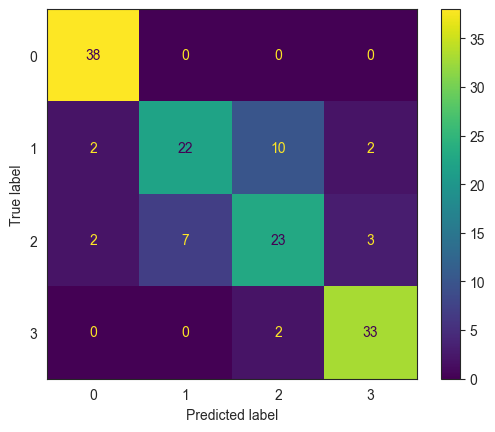

In [1041]:
plot_confusion_matrix(rfc, X_test, y_test)

In [1042]:
# Use SVM

from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

prediction = svc.predict(X_test)
# check the accuracy on the training set
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.8504347826086956
0.8194444444444444


c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


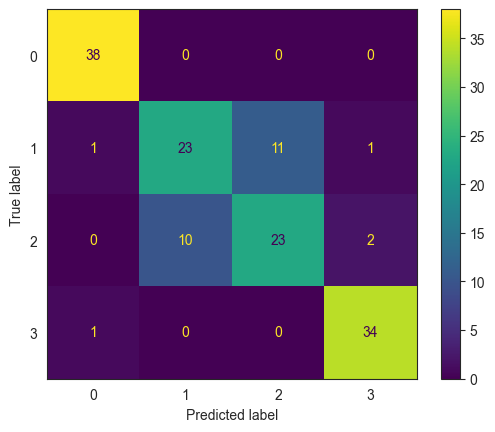

In [1043]:
plot_confusion_matrix(svc, X_test, y_test)

# Final Model

In [1049]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
final_model = LogisticRegression()
final_model.fit(X_train, y_train)
print(final_model.score(X_train, y_train))
print("Accuracy: ", final_model.score(X_test, y_test)) 

0.7895652173913044
Accuracy:  0.8333333333333334


c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


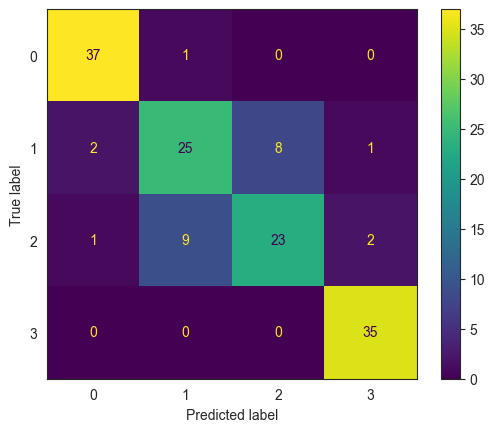

In [1045]:
plot_confusion_matrix(final_model, X_test, y_test);

In [1048]:
from sklearn.metrics import f1_score
print("F1 score of the final model: ", f1_score(y_test, final_model.predict(X_test), average='micro'))

F1 score of the final model:  0.8333333333333334


After fitting the features with multiple models, the best model is the Logistic Regression Model.

The Accuracy of the model is approximately 83%